In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
warnings.filterwarnings(action='ignore')

In [9]:
x_df = pd.read_csv('x_df.csv')
x_df = x_df.iloc[:, 1:]

y_all_df = pd.read_csv('cell_health_modz.tsv', sep = '\t')
y_df = y_all_df['cc_all_n_spots_h2ax_per_nucleus_area_mean']

y_df_binarized = np.load('y_df_binarized.npy')

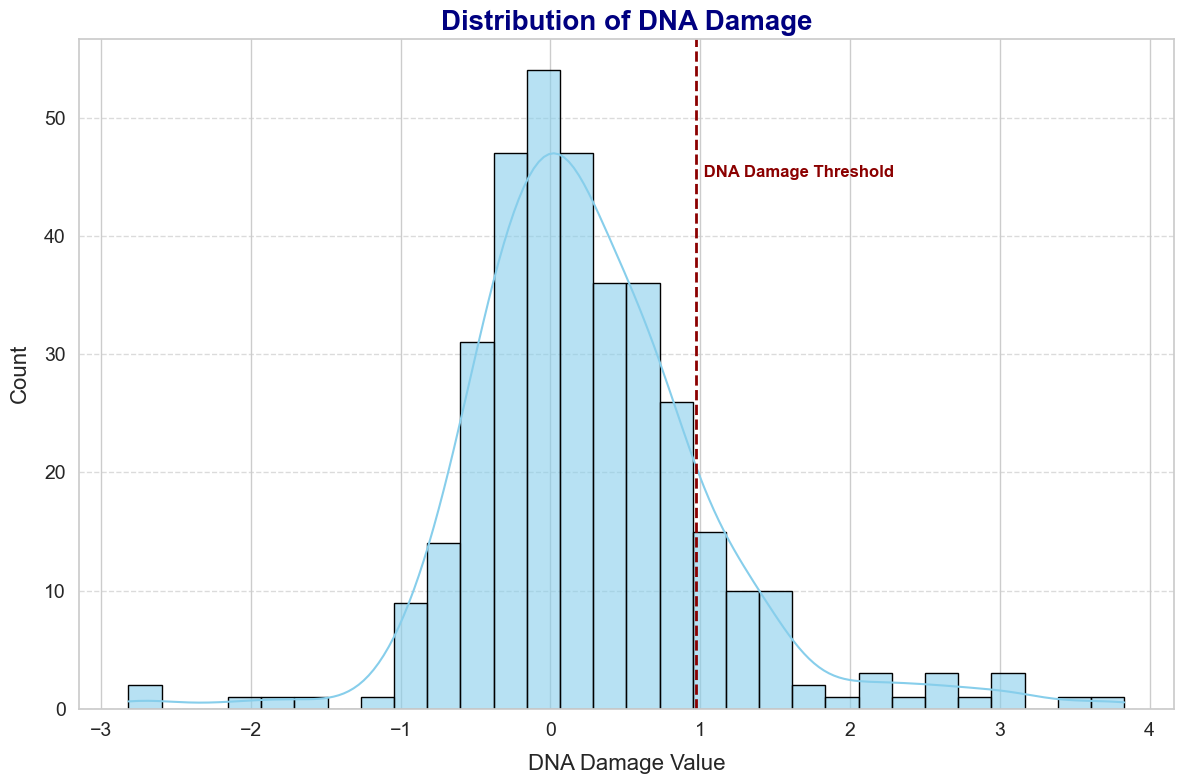

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

cutoff_value = 0.970800566691554

# Data Distribution visualization
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Histogram with gradient color based on density
sns.histplot(y_df, bins=30, kde=True, 
             color='skyblue', 
             edgecolor='black', 
             alpha=0.6)

# Cutoff Line
plt.axvline(x=cutoff_value, color='darkred', linestyle='--', linewidth=2)
plt.text(cutoff_value + 0.02, plt.ylim()[1] * 0.8, ' DNA Damage Threshold', color='darkred', 
         ha='left', va='center', fontweight='bold', fontsize=12)

# Adding Title and Labels with enhanced style
plt.title('Distribution of DNA Damage', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('DNA Damage Value', fontsize=16, labelpad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)

# Customize ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
plt.savefig('Distribution of DNA Damage.png', dpi=300)
plt.show()


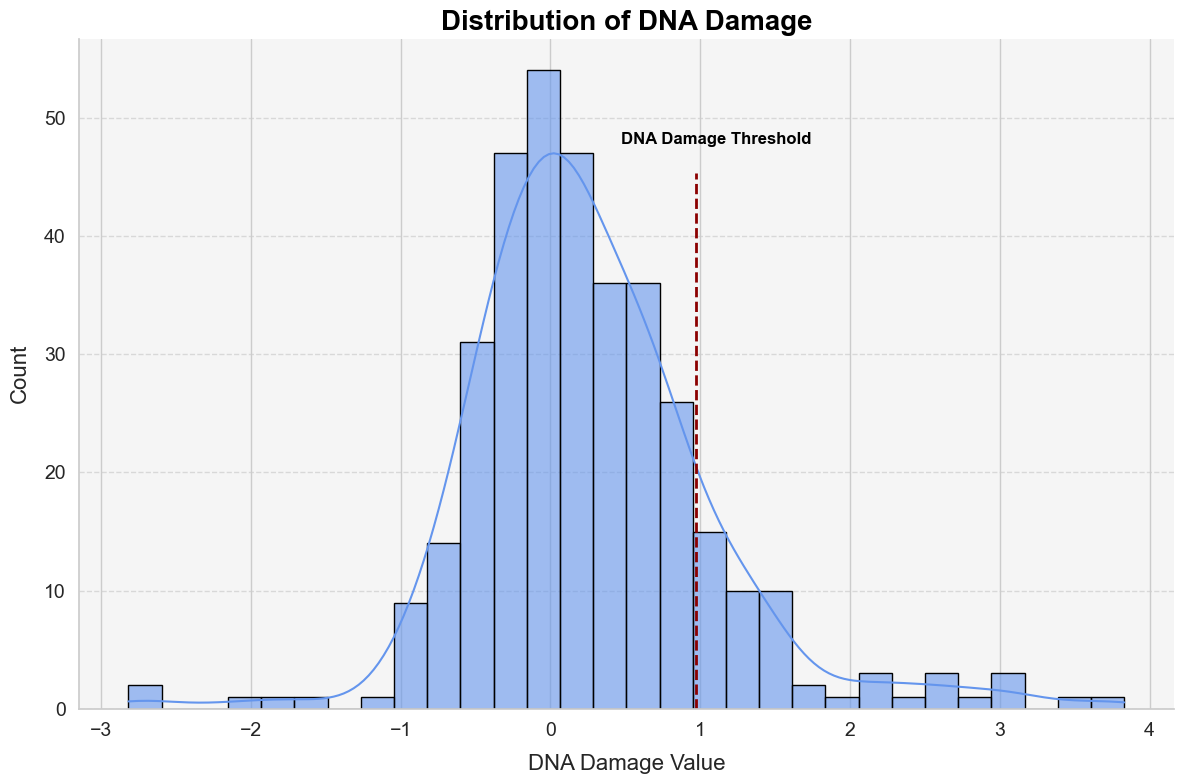

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

cutoff_value = 0.970800566691554

# Data Distribution visualization
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Set a vibrant color palette
sns.set_palette(sns.color_palette("husl", 8))  # Using 'husl' for vibrant colors

# Histogram with gradient color based on density
sns.histplot(y_df, bins=30, kde=True, 
             color='cornflowerblue', 
             edgecolor='black', 
             alpha=0.6)

# Cutoff Line (with limited length)
plt.axvline(x=cutoff_value, color='darkred', linestyle='--', linewidth=2, ymin=0.0, ymax=0.8)

# Move the label position up and change color to black
plt.text(cutoff_value-0.5, plt.ylim()[1] * 0.85, 'DNA Damage Threshold', color='black', 
         ha='left', va='center', fontweight='bold', fontsize=12)

# Adding Title and Labels with enhanced style
plt.title('Distribution of DNA Damage', fontsize=20, fontweight='bold', color='black')
plt.xlabel('DNA Damage Value', fontsize=16, labelpad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)

# Customize ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Enhance aesthetics
plt.gca().set_facecolor('whitesmoke')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
plt.savefig('Distribution of DNA Damage.png', dpi=300)
plt.show()

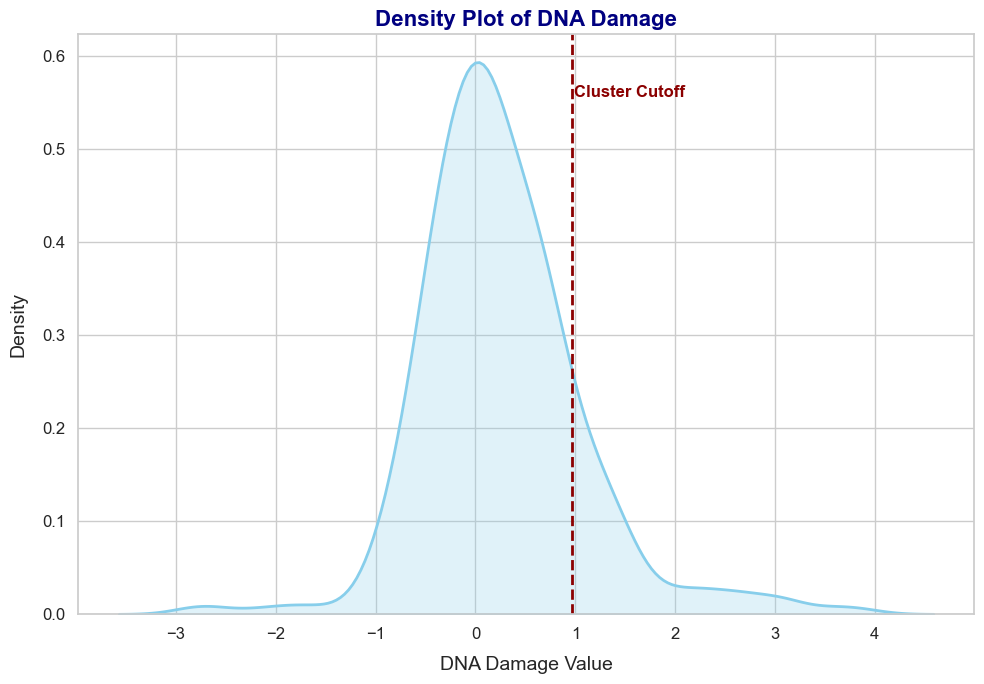

In [12]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# KDE Plot
sns.kdeplot(y_df, fill=True, color='skyblue', linewidth=2)

# Cutoff Line
plt.axvline(x=cutoff_value, color='darkred', linestyle='--', linewidth=2)
plt.text(cutoff_value + 0.02, plt.ylim()[1] * 0.9, 'Cluster Cutoff', color='darkred', 
         ha='left', va='center', fontweight='bold', fontsize=12)

# Titles and labels
plt.title('Density Plot of DNA Damage', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('DNA Damage Value', fontsize=14, labelpad=10)
plt.ylabel('Density', fontsize=14, labelpad=10)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('Density Plot of DNA Damage.png', dpi=300)
plt.show()

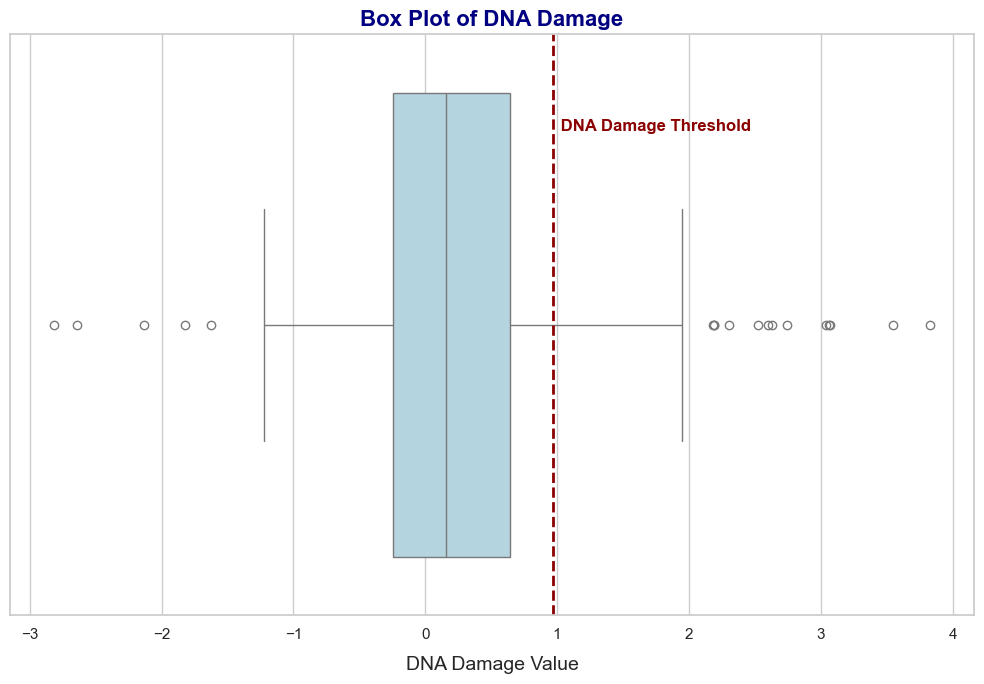

In [94]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Box Plot
sns.boxplot(x=y_df, color='lightblue')

# Cutoff Line
plt.axvline(x=cutoff_value, color='darkred', linestyle='--', linewidth=2)
plt.text(cutoff_value + 0.02, np.median(y_df)-0.5, ' DNA Damage Threshold', color='darkred', 
         ha='left', va='center', fontweight='bold', fontsize=12)

# Titles and labels
plt.title('Box Plot of DNA Damage', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('DNA Damage Value', fontsize=14, labelpad=10)

plt.tight_layout()
plt.savefig('Box Plot of DNA Damage.png', dpi=300)
plt.show()

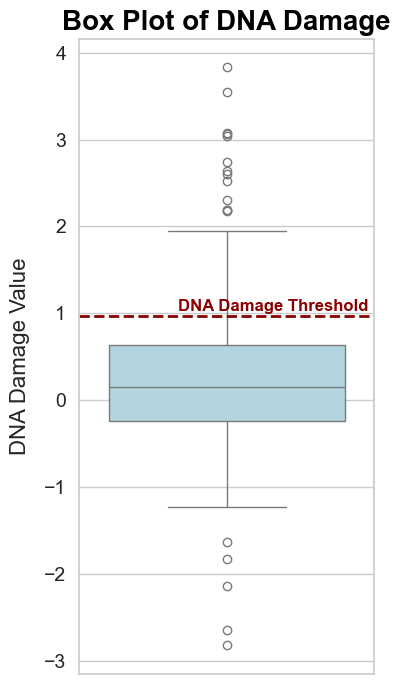

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

cutoff_value = 0.970800566691554

plt.figure(figsize=(4, 7))
sns.set(style="whitegrid")

# Box Plot - axis: y
sns.boxplot(y=y_df, color='lightblue')

# Cutoff Line
plt.axhline(y=cutoff_value, color='darkred', linestyle='--', linewidth=2)  
plt.text(np.median(y_df), cutoff_value + 0.02, 'DNA Damage Threshold', color='darkred', 
         ha='center', va='bottom', fontweight='bold', fontsize=12)

# Titles and labels
plt.title('Box Plot of DNA Damage', fontsize=20, fontweight='bold', color='black')
plt.ylabel('DNA Damage Value', fontsize=16, labelpad=10)

# Customize ticks
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig('Box Plot of DNA Damage.png', dpi=300)
plt.show()

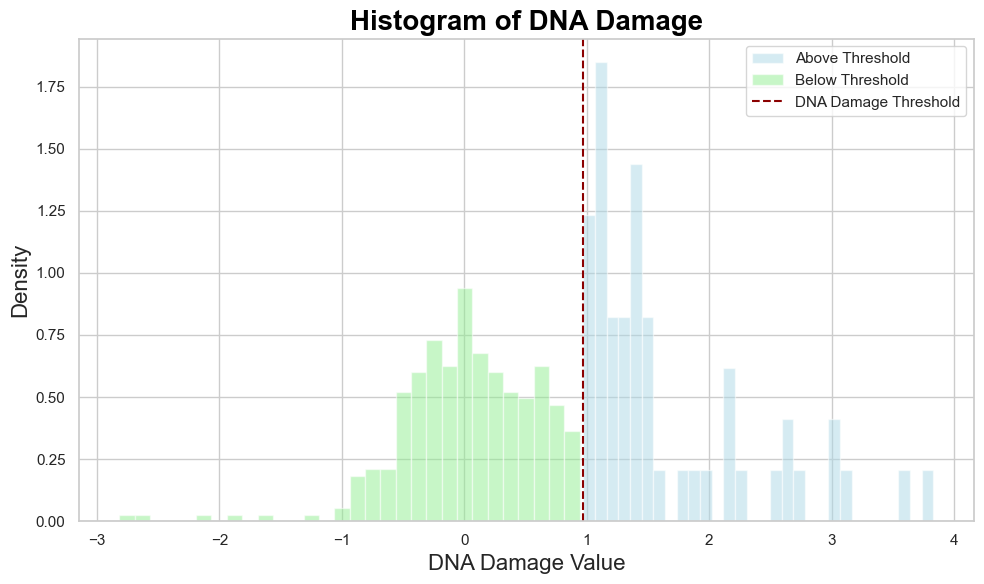

In [148]:
above_threshold = y_df[y_df >= cutoff_value]
below_threshold = y_df[y_df < cutoff_value]

plt.figure(figsize=(10, 6))
plt.hist(above_threshold, bins=30, alpha=0.5, label='Above Threshold', color='lightblue', density=True)
plt.hist(below_threshold, bins=30, alpha=0.5, label='Below Threshold', color='lightgreen', density=True)
plt.axvline(x=cutoff_value, color='darkred', linestyle='--', label='DNA Damage Threshold')

# Titles and labels
plt.title('Histogram of DNA Damage', fontsize=20, fontweight='bold', color='black')
plt.xlabel('DNA Damage Value', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig('Histogram of DNA Damage.png', dpi=300)
plt.show()

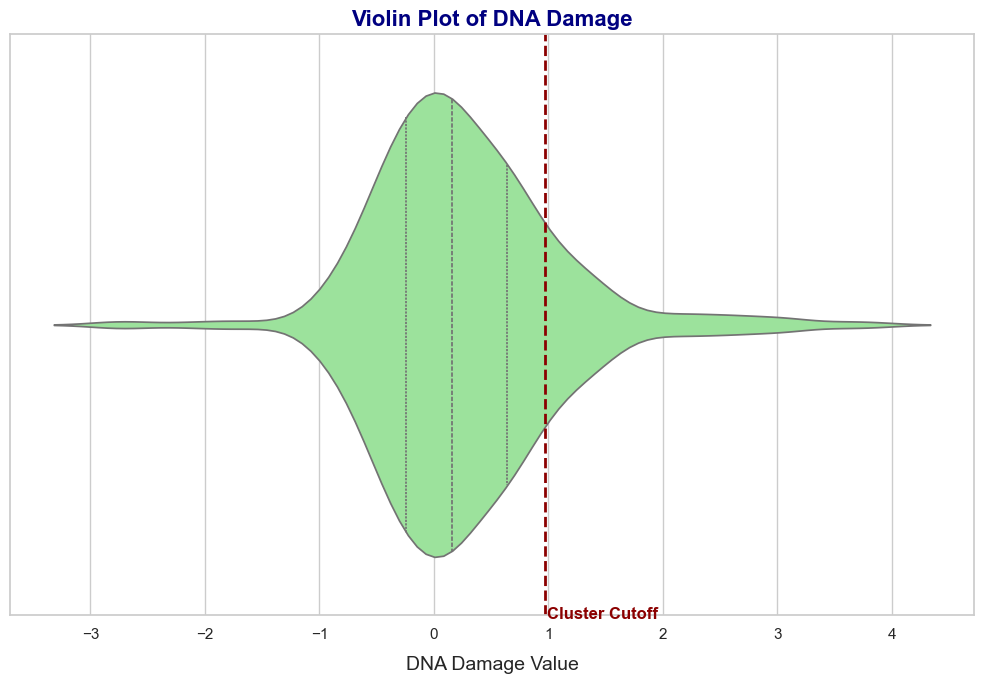

In [14]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Violin Plot
sns.violinplot(x=y_df, color='lightgreen', inner="quartile")

# Cutoff Line
plt.axvline(x=cutoff_value, color='darkred', linestyle='--', linewidth=2)
plt.text(cutoff_value + 0.02, 0.5, 'Cluster Cutoff', color='darkred', 
         ha='left', va='center', fontweight='bold', fontsize=12)

# Titles and labels
plt.title('Violin Plot of DNA Damage', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('DNA Damage Value', fontsize=14, labelpad=10)

plt.tight_layout()
plt.savefig('Violin Plot of DNA Damage.png', dpi=300)
plt.show()

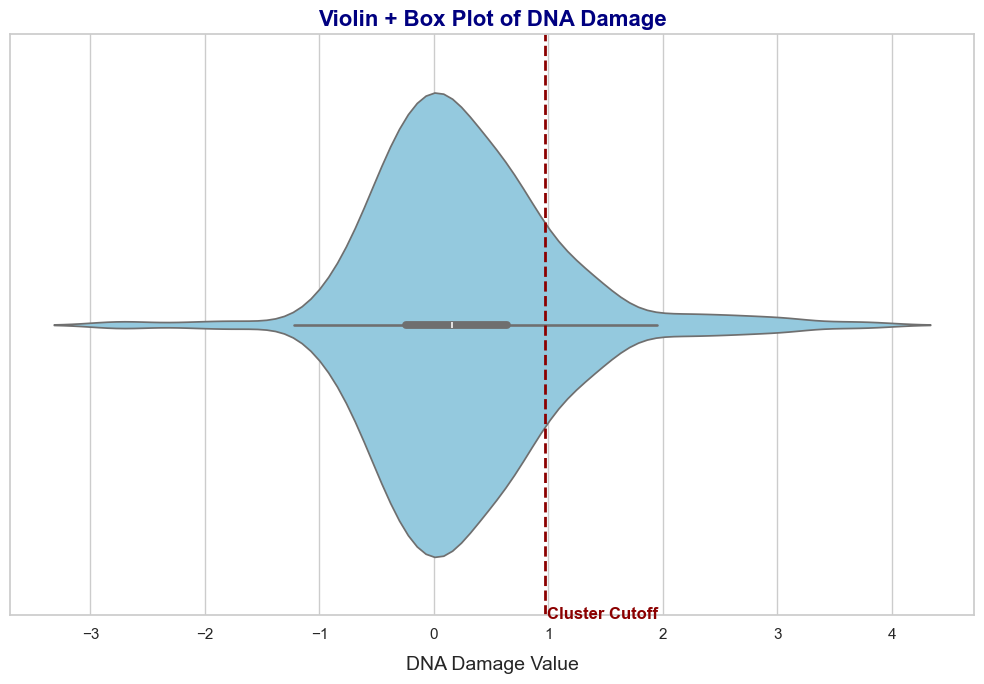

In [15]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Violin Plot with Box Plot inside
sns.violinplot(x=y_df, color='skyblue', inner="box")

# Cutoff Line
plt.axvline(x=cutoff_value, color='darkred', linestyle='--', linewidth=2)
plt.text(cutoff_value + 0.02, 0.5, 'Cluster Cutoff', color='darkred', 
         ha='left', va='center', fontweight='bold', fontsize=12)

# Titles and labels
plt.title('Violin + Box Plot of DNA Damage', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('DNA Damage Value', fontsize=14, labelpad=10)

plt.tight_layout()
plt.savefig('Violin + Box Plot of DNA Damage.png', dpi=300)
plt.show()

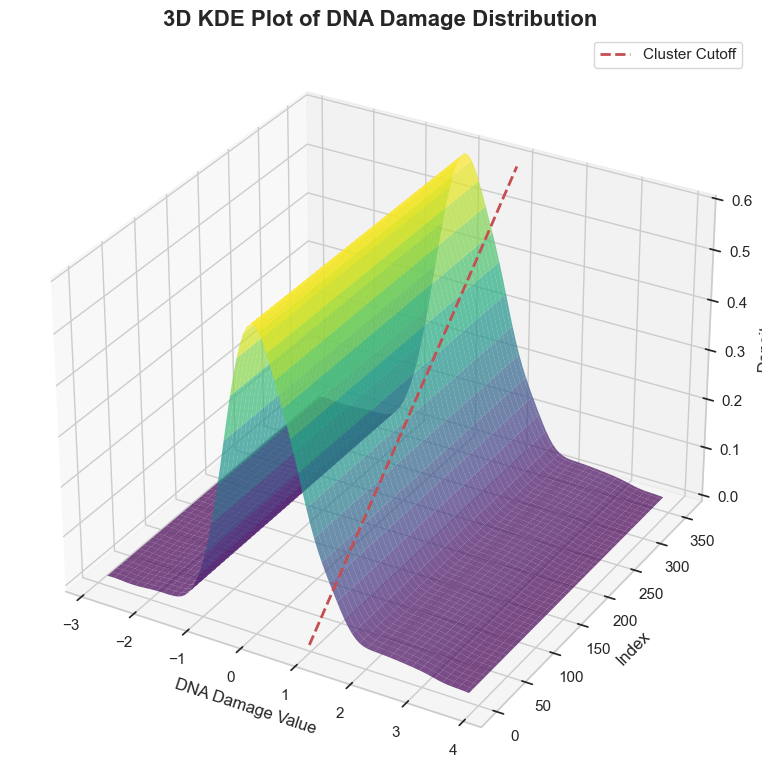

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

# Sample data
data = y_df.values.flatten()

# Generate 2D grid for KDE
x = np.linspace(data.min(), data.max(), 100)
y = np.linspace(0, len(data), 100)
X, Y = np.meshgrid(x, y)

# Calculate KDE values for the grid
kde = gaussian_kde(data)
Z = kde(X.ravel()).reshape(X.shape)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)

# Cutoff line
ax.plot([cutoff_value, cutoff_value], [0, len(data)], [0, max(Z.ravel())], 'r--', linewidth=2, label='Cluster Cutoff')

# Labels and title
ax.set_title('3D KDE Plot of DNA Damage Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('DNA Damage Value')
ax.set_ylabel('Index')
ax.set_zlabel('Density')
ax.legend()

plt.tight_layout()
plt.show()

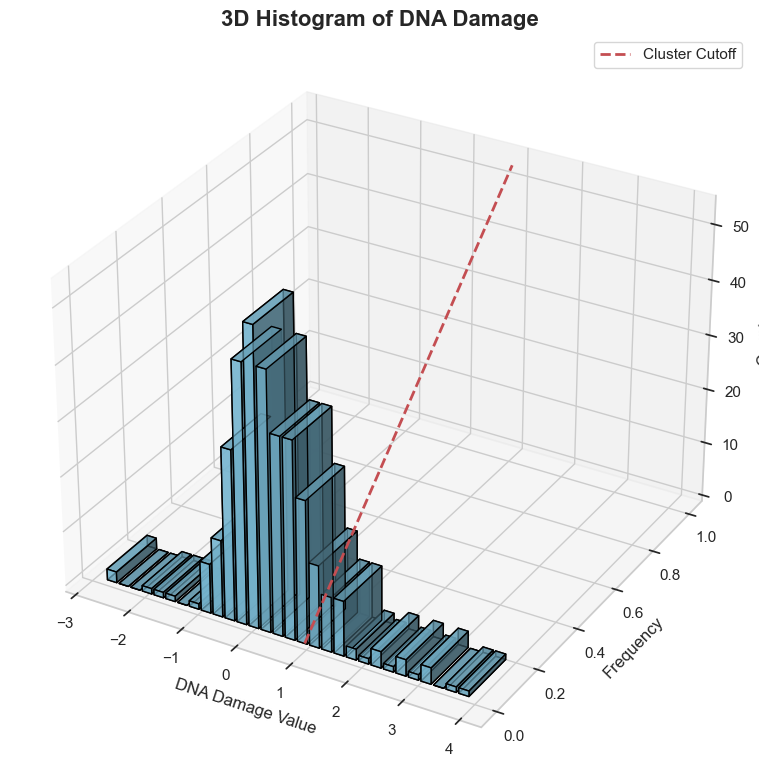

In [18]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Histogram data
hist, bins = np.histogram(data, bins=30)
x_pos = (bins[:-1] + bins[1:]) / 2  # center of bins
y_pos = np.zeros_like(x_pos)
z_pos = np.zeros_like(x_pos)

# Histogram bars
dx = dy = (bins[1] - bins[0]) * 0.8  # width of each bar
dz = hist  # height of each bar

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='skyblue', edgecolor='black', alpha=0.7)

# Cutoff line
ax.plot([cutoff_value, cutoff_value], [0, 1], [0, max(dz)], 'r--', linewidth=2, label='Cluster Cutoff')

# Labels and title
ax.set_title('3D Histogram of DNA Damage', fontsize=16, fontweight='bold')
ax.set_xlabel('DNA Damage Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Count')
ax.legend()

plt.tight_layout()
plt.show()

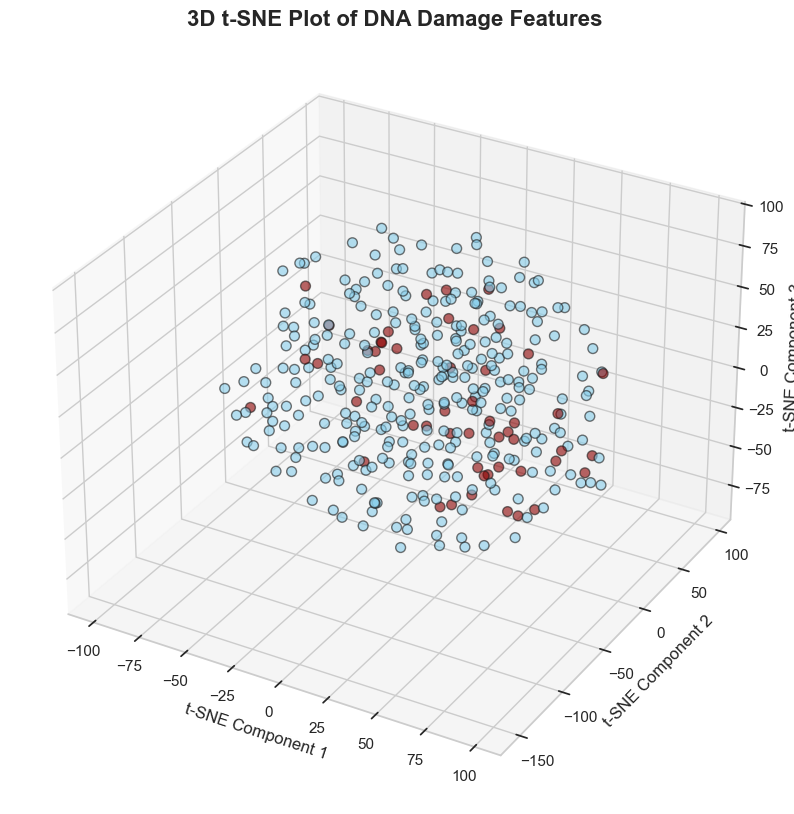

In [64]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


# PCA dimension redcution
pca = PCA(n_components=50)  # 50 dimension
X_pca = pca.fit_transform(X)

# t-SNE 
tsne = TSNE(n_components=3, perplexity=50, n_iter=1000, learning_rate=100, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# 3D visualized
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Class Labeling
colors = np.where(y == 0, 'skyblue', 'darkred')
sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=colors, edgecolor='k', s=50, alpha=0.6)

# Axis Setting
ax.set_title('3D t-SNE Plot of DNA Damage Features', fontsize=16, fontweight='bold')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()

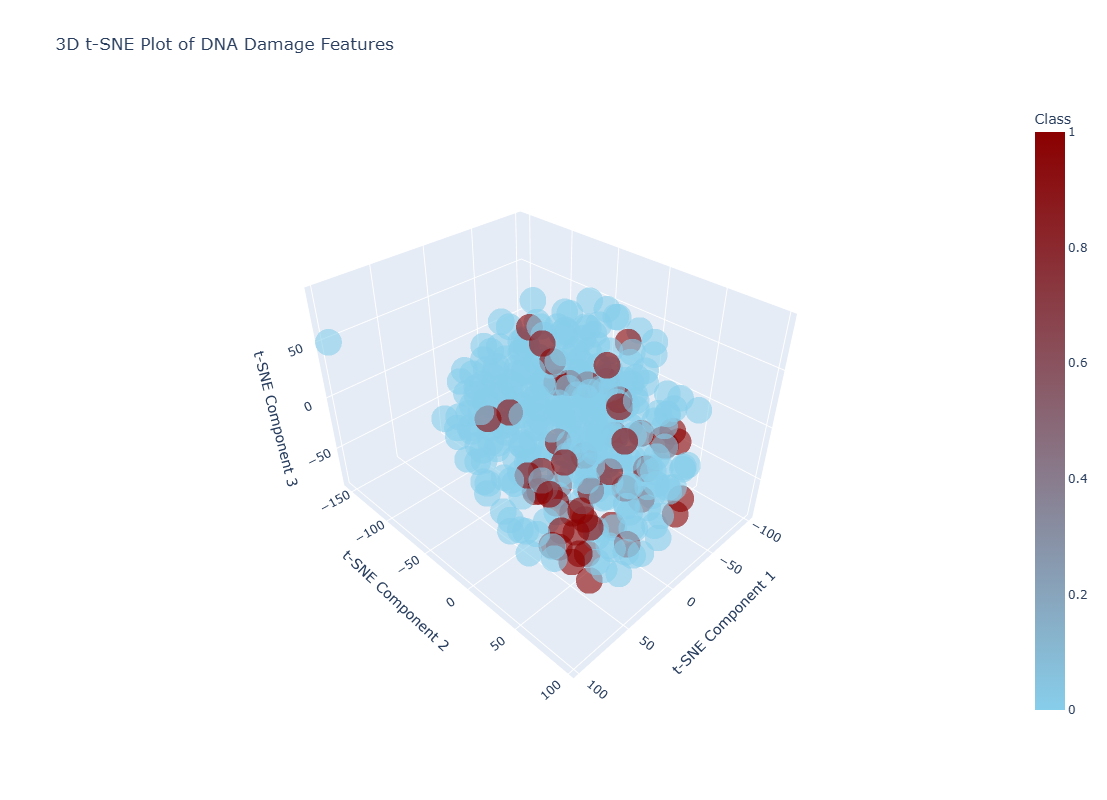

In [74]:
import plotly.express as px
import plotly.io as pio

# t-SNE result to dataframe
df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2', 'Component 3'])
df_tsne['Label'] = y  # Original Label

# Interactive 3D Plot
fig = px.scatter_3d(
    df_tsne,
    x='Component 1',
    y='Component 2',
    z='Component 3',
    color='Label',
    color_continuous_scale=['skyblue', 'darkred'],
    title='3D t-SNE Plot of DNA Damage Features',
    labels={'Label': 'Class'},
    opacity=0.6,
    size_max=0.0001  # data point size 
)

# axis label & setting
fig.update_layout(
    scene=dict(
        xaxis_title='t-SNE Component 1',
        yaxis_title='t-SNE Component 2',
        zaxis_title='t-SNE Component 3',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))  # Camera setting
    ),
    width=1200,  # plot width setting
    height=800   # plot height setting
)

# 플롯 표시
pio.write_html(fig, 'interactive_plot.html')
fig.show()